In [92]:
import numpy as np
import tensorflow as tf

In [93]:
from tensorflow.python.keras._impl.keras.engine import Input
from tensorflow.python.keras._impl.keras.engine import Layer
from tensorflow.python.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.python.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras._impl.keras.utils import layer_utils
from tensorflow.python.keras._impl.keras.utils import get_file
from tensorflow.python.keras._impl.keras.utils import np_utils
from tensorflow.python.keras._impl.keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from tensorflow.python.keras._impl.keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras._impl.keras.utils.vis_utils import plot_model
#from kt_utils import *
from tensorflow.python.keras.initializers import glorot_uniform
from tensorflow.python.keras import backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os

%matplotlib inline

In [10]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [12]:
data_batch_1=unpickle('D:\\0_Study Notes\\ng deeplearning\\cifar-10-python\\data_batch_1')

In [19]:
len(data_batch_1)

4

这里的data_batch_1包含4个key值，分别是标签lables，文件名filenames，数据集data，批次编号batch_lable，   
它们的value分别lables的value为10000个0-9之间的整数，filenames的value为形如'leptodactylus_pentadactylus_s_000004.png'字符串形式，data的value是10000x3027的numpy array,batch_lable的value为形如'training batch 1 of 5'的字符串，，和官网的介绍有点不一致。

In [28]:
for key in data_batch_1.keys():
    print(key)

b'labels'
b'filenames'
b'data'
b'batch_label'


In [29]:
for value in data_batch_1.values():
    print(value)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [27]:
for item in data_batch_1.items():
    print(item)

(b'labels', [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 

In [32]:
labels1 = data_batch_1[b'labels']  # 要带上b，bytes二进制表示  labels1是列表 用len(labels)可以得到其长度
data1 = data_batch_1[b'data']  # data1是numpy array，直接data1.shape就能得到其大小

In [37]:
data1.shape

(10000, 3072)

In [94]:
def load_batch(path):
    """
    Load one batch 
    
    Arguments:
        filepath of batch
    
    Returns:
        data -- one batch data
        labels -- one batch lables
    """
    import pickle
    with open(path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    data = np.array(dict[b'data']).reshape(10000, 32, 32, 3)
    labels = np.array(dict[b'labels']).reshape(10000, 1)
    
    return data, labels

In [95]:
def load_data(path):
    """
    Loads CIFAR10 dataset.
    
    Arguments:
        path -- CIFAR10 filepath
        
    Returns:
        Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)
    """
    num_train_samples = 50000
    # 这个有借鉴意义，就是先np.zeros先生成训练集的大小，然后再放数据
    x_train = np.zeros((num_train_samples, 32, 32, 3), dtype = 'uint8') 
    y_train = np.zeros((num_train_samples,1), dtype =  'uint8')
    
    # 读取训练的50000个数据
    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        data, labels = load_batch(fpath)
        x_train[(i - 1) * 10000 : i * 10000, :, :, :] = data
        y_train[(i - 1) * 10000 : i * 10000] = labels
        
    # 读取测试的10000个数据
    fpath = os.path.join(path, 'test_batch')
    x_test, y_test = load_batch(fpath)
    
    return x_train, y_train, x_test, y_test   

In [96]:
cifar10_path = 'D:\\0_Study Notes\\ng deeplearning\\cifar-10-python'
x_train, y_train, x_test, y_test = load_data(cifar10_path)

In [97]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [98]:
print('x_train shape = '+ str(x_train.shape))
print('y_train shape = '+ str(y_train.shape))
print('x_test shape =' + str(x_test.shape))
print('y_test shape ' + str(y_test.shape))

x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 10)
x_test shape =(10000, 32, 32, 3)
y_test shape (10000, 10)


In [160]:
def model(input_shape):
    X_input = Input(input_shape)
    
    X = Conv2D(32, (5, 5), strides=(1, 1))(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(64, (5, 5), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    print(X.shape)
    #X = MaxPooling2D((2,2), padding = 'valid')(X)
    print(X.shape)
    ###
    X = Conv2D(64, (3, 3), strides=(1, 1))(X)
    #X = Dropout(0.5, seed=1)(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(128, (3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2,2), padding = 'valid')(X)
    
    print(X.shape)
    
    ####
    X = Conv2D(512, (3, 3), strides=(1, 1))(X)
    #X = Dropout(0.8, seed=1)(X) # 在我这个例子中使用dropout好像没啥效果
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(512, (3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), padding = 'same')(X)
    
    X = Flatten()(X)
    X = Dense(100, activation = 'relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(10, activation = 'sigmoid',kernel_initializer=glorot_uniform(seed=0))(X)
    
    model = Model(inputs = X_input, outputs = X)
    return model

In [161]:
x_train.shape[1:4]

(32, 32, 3)

In [162]:
cifarModel = model(x_train.shape[1:4])

(?, 24, 24, 64)
(?, 24, 24, 64)
(?, 10, 10, 128)


In [163]:
cifarModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [164]:
cifarModel.fit(x=x_train, y=y_train, epochs=30, batch_size=128)

Epoch 1/30
50000/50000 [==============================] - 45s - loss: 2.1301 - acc: 0.1593    
Epoch 2/30
50000/50000 [==============================] - 41s - loss: 1.6890 - acc: 0.3688    
Epoch 3/30
50000/50000 [==============================] - 41s - loss: 1.4783 - acc: 0.4634    
Epoch 4/30
50000/50000 [==============================] - 41s - loss: 1.3525 - acc: 0.5117    
Epoch 5/30
50000/50000 [==============================] - 41s - loss: 1.2528 - acc: 0.5495    
Epoch 6/30
50000/50000 [==============================] - 41s - loss: 1.1821 - acc: 0.5769    
Epoch 7/30
50000/50000 [==============================] - 41s - loss: 1.1196 - acc: 0.5976    
Epoch 8/30
50000/50000 [==============================] - 40s - loss: 1.0652 - acc: 0.6200    
Epoch 9/30
50000/50000 [==============================] - 41s - loss: 1.0110 - acc: 0.6383    
Epoch 10/30
50000/50000 [==============================] - 41s - loss: 0.9642 - acc: 0.6557    
Epoch 11/30
50000/50000 [========================

In [165]:
preds = cifarModel.evaluate(x=x_test, y=y_test)
print()
print("Loss = " + str(preds[0]))
print("Test Accuracy =" + str(preds[1]))

 9984/10000 [============================>.] - ETA: 0s
Loss = 4.00947672157
Test Accuracy =0.4678


In [200]:
# 通过调用metrics_name可以知道evaluate的返回值，即preds是个列表。preds=['loss', 'acc']
cifarModel.metrics_names  

['loss', 'acc']

In [201]:
# save cifarModel weights
import h5py
cifarModel.save_weights('cifarModel.h5')

ImportError: `save_weights` requires h5py.

In [189]:
cifarModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization_103 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
activation_103 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 24, 24, 64)        51264     
_________________________________________________________________
batch_normalization_104 (Bat (None, 24, 24, 64)        256       
_________________________________________________________________
activation_104 (Activation)  (None, 24, 24, 64)        0         
__________

In [190]:
plot_model(cifarModel, to_file='cifarModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


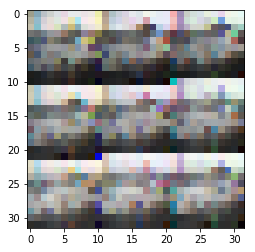

In [188]:
# 恢复一张图片 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline 
#image1 = x_test[2,:,:,:]
print(y_test[2])
type(image1)
image1.shape
#print(image1)
imshow(image1)

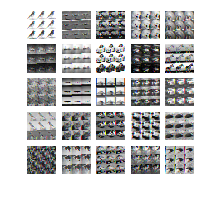

In [185]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(x_test)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x_test[i:i+1][0])

In [ ]:
"""
# Following prints 5X5 grid of random Cifar10 images. 
# It isn't blurry, though not perfect either. 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

f = open('data/cifar10/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f,encoding='latin1')
f.close()
X = datadict["data"] 
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])
"""